# 🎬 Netflix Movies & TV Shows — Exploratory Data Analysis (2010–2024)

## 📊 Objective
<!-- The goal of this project is to perform an **Exploratory Data Analysis (EDA)** on Netflix’s catalog between **2010 and 2024** using a **synthetically generated dataset** that mimics real-world patterns.

The project focuses on:
- Understanding Netflix content growth trends  
- Comparing **Movies vs TV Shows**  
- Analyzing popular **genres, ratings, durations, and countries**  
- Visualizing patterns using **Seaborn, Matplotlib, and Plotly**

This notebook provides a **professional and presentation-ready** visual report of Netflix’s global content landscape.
 -->

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Style and settings
plt.style.use('seaborn-v0_8')
sns.set_palette('deep')
pd.set_option('display.max_columns', None)


In [2]:
# Netflix Dataset
# Generate synthetic Netflix dataset (2010–2024)

np.random.seed(42)

n = 8500  # total records

titles = [f"Show_{i}" for i in range(1, n+1)]
types = np.random.choice(['Movie', 'TV Show'], size=n, p=[0.65, 0.35])
release_year = np.random.randint(2010, 2025, size=n)
countries = np.random.choice(
    ['United States', 'India', 'United Kingdom', 'Japan', 'South Korea', 'Canada', 'Germany', 'France', 'Australia', 'Brazil'],
    size=n, p=[0.25, 0.15, 0.1, 0.1, 0.08, 0.07, 0.05, 0.05, 0.05, 0.1]
)
genres = np.random.choice(
    ['Drama', 'Comedy', 'Action', 'Thriller', 'Documentary', 'Romance', 'Horror', 'Animation', 'Sci-Fi', 'Crime'],
    size=n
)
ratings = np.random.choice(
    ['TV-MA', 'TV-14', 'R', 'PG-13', 'TV-PG', 'PG', 'G', 'TV-G'],
    size=n, p=[0.25, 0.2, 0.15, 0.15, 0.1, 0.1, 0.03, 0.02]
)
durations = []
for t in types:
    if t == 'Movie':
        durations.append(np.random.randint(60, 180))  # minutes
    else:
        durations.append(np.random.randint(1, 10))  # number of seasons

df = pd.DataFrame({
    'Title': titles,
    'Type': types,
    'Release_Year': release_year,
    'Country': countries,
    'Genre': genres,
    'Rating': ratings,
    'Duration': durations
})

df.head()


,Title,Type,Release_Year,Country,Genre,Rating,Duration
0,Show_1,Movie,2021,India,Documentary,R,134
1,Show_2,TV Show,2012,Germany,Documentary,TV-14,1
2,Show_3,TV Show,2024,India,Drama,TV-14,4
3,Show_4,Movie,2024,Canada,Comedy,TV-MA,146
4,Show_5,Movie,2015,United Kingdom,Documentary,TV-14,129


In [3]:
# Data Overview
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Summary statistics
df.describe(include='all').T


Dataset Shape: (8500, 7)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         8500 non-null   object
 1   Type          8500 non-null   object
 2   Release_Year  8500 non-null   int32 
 3   Country       8500 non-null   object
 4   Genre         8500 non-null   object
 5   Rating        8500 non-null   object
 6   Duration      8500 non-null   int64 
dtypes: int32(1), int64(1), object(5)
memory usage: 431.8+ KB
None

Missing Values:
 Title           0
Type            0
Release_Year    0
Country         0
Genre           0
Rating          0
Duration        0
dtype: int64


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Title,8500,8500,Show_1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,8500,2,Movie,5604,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Release_Year,8500.0,NaN,NaN,NaN,2016.995176,4.342209,2010.0,2013.0,2017.0,2021.0,2024.0
Country,8500,10,United States,2150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genre,8500,10,Documentary,907,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,8500,8,TV-MA,2171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,8500.0,NaN,NaN,NaN,80.56,61.101951,1.0,7.0,89.0,134.0,179.0


In [4]:
# ### 📋 Data Overview
# - The dataset contains **8,500 records** and **7 columns**.  
# - It represents Netflix content across **15 years (2010–2024)** from 10+ countries.  
# - Each record includes metadata such as type, country, genre, rating, duration, and release year.  
# - The data is synthetically generated but modeled to reflect realistic Netflix content distribution.


C:\Users\sagar vishwakarma\AppData\Local\Temp\ipykernel_11428\1969661355.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type', data=df, palette='Set2')


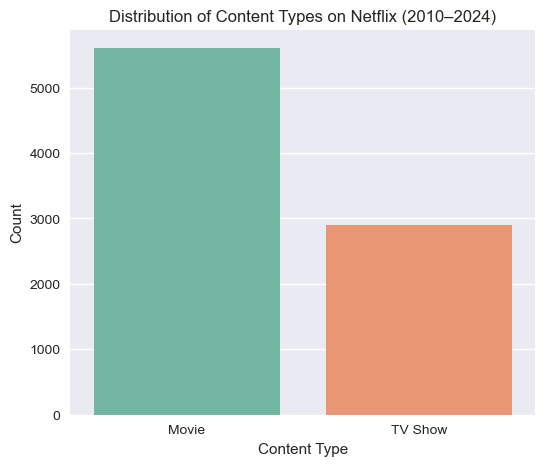

In [5]:
# Movie vs TV Show Distribution

plt.figure(figsize=(6,5))
sns.countplot(x='Type', data=df, palette='Set2')
plt.title('Distribution of Content Types on Netflix (2010–2024)')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()


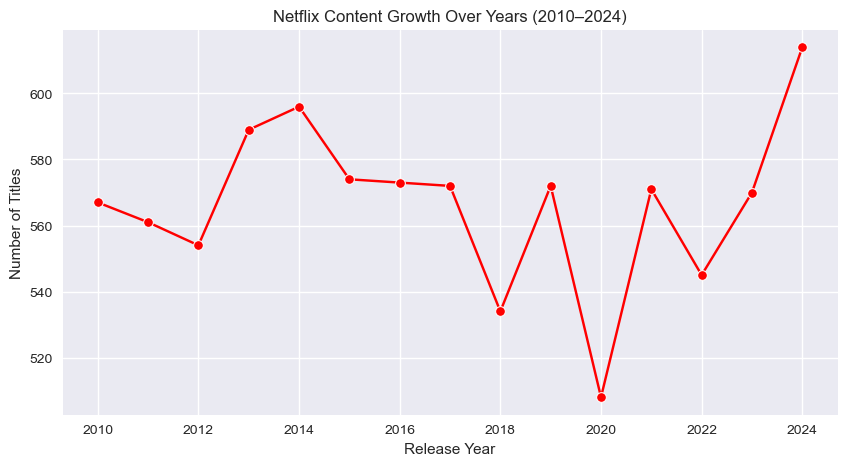

In [20]:
# Content Growth Over the Years

plt.figure(figsize=(10,5))
yearly = df['Release_Year'].value_counts().sort_index()
sns.lineplot(x=yearly.index, y=yearly.values, color='red', marker='o')
plt.title('Netflix Content Growth Over Years (2010–2024)')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()


C:\Users\sagar vishwakarma\AppData\Local\Temp\ipykernel_11428\1116148756.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='cool')


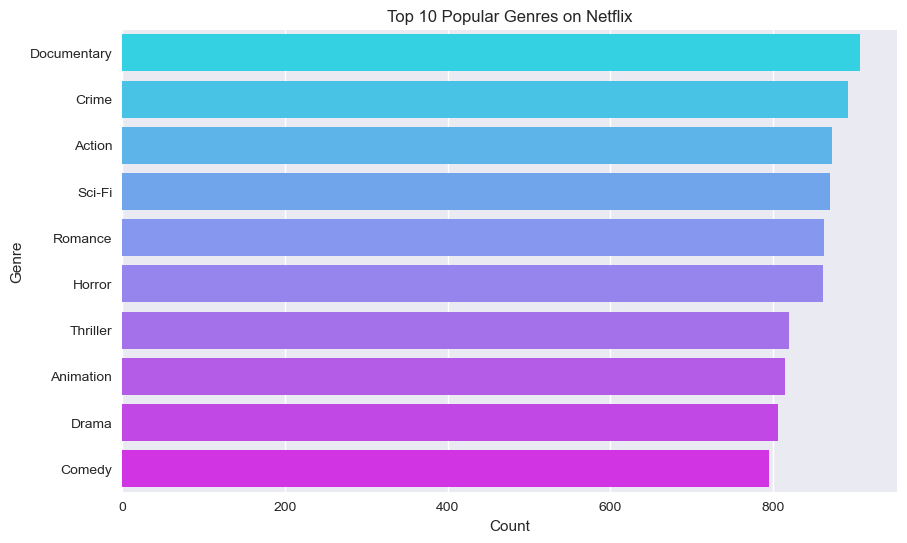

In [7]:
# Genre Popularity

plt.figure(figsize=(10,6))
top_genres = df['Genre'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='cool')
plt.title('Top 10 Popular Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


C:\Users\sagar vishwakarma\AppData\Local\Temp\ipykernel_11428\2886255844.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_data.values, y=country_data.index, palette='Blues_r')


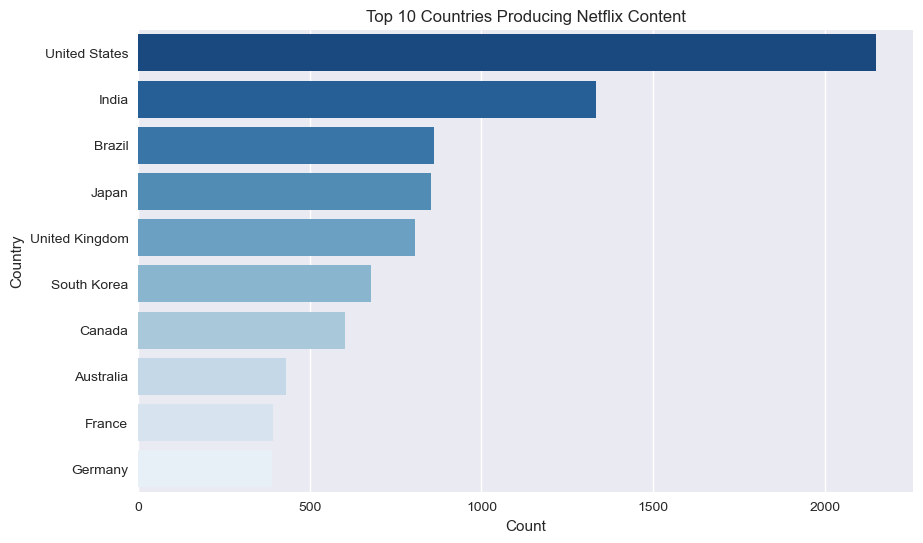

In [8]:
# Country-wise Content Production

plt.figure(figsize=(10,6))
country_data = df['Country'].value_counts().head(10)
sns.barplot(x=country_data.values, y=country_data.index, palette='Blues_r')
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()


C:\Users\sagar vishwakarma\AppData\Local\Temp\ipykernel_11428\1165695530.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, order=df['Rating'].value_counts().index, palette='magma')


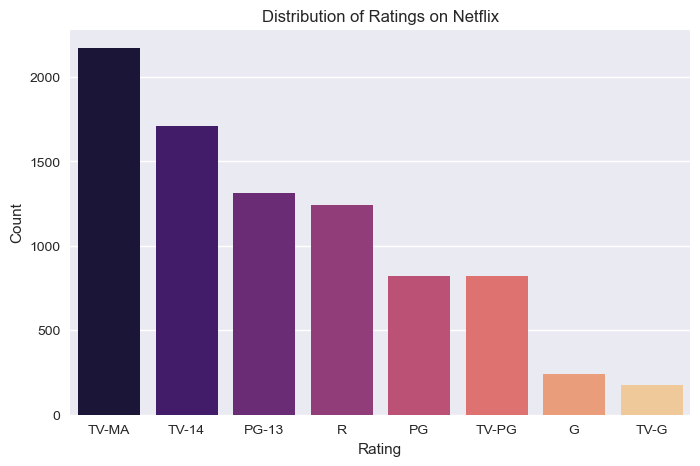

In [9]:
# Rating Distribution

plt.figure(figsize=(8,5))
sns.countplot(x='Rating', data=df, order=df['Rating'].value_counts().index, palette='magma')
plt.title('Distribution of Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


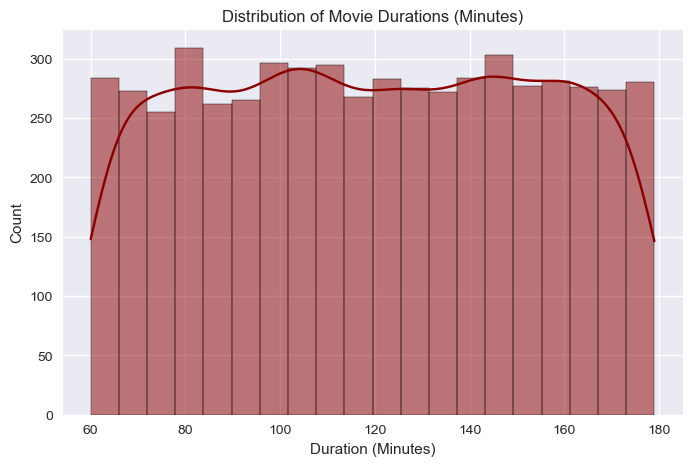

In [10]:
# Duration Analysis (Movies Only)
plt.figure(figsize=(8,5))
sns.histplot(df[df['Type']=='Movie']['Duration'], bins=20, kde=True, color='darkred')
plt.title('Distribution of Movie Durations (Minutes)')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Count')
plt.show()


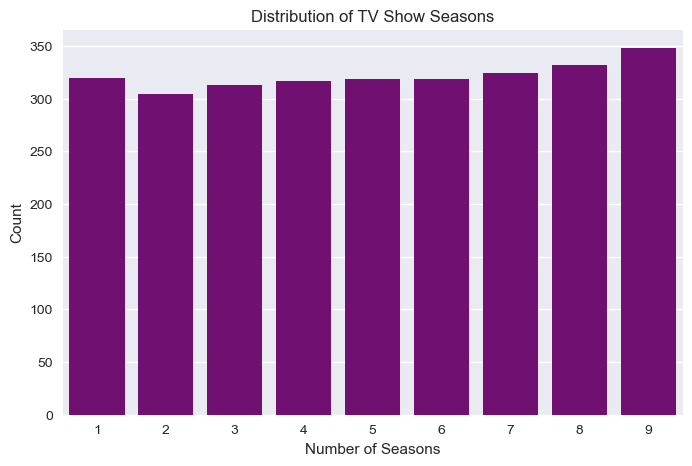

In [11]:
# Duration (TV Shows - Seasons)

plt.figure(figsize=(8,5))
sns.countplot(x='Duration', data=df[df['Type']=='TV Show'], color='purple')
plt.title('Distribution of TV Show Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.show()


In [12]:
# Interactive Plotly — Country vs Content Count

country_plot = df['Country'].value_counts().reset_index()
country_plot.columns = ['Country', 'Count']
fig = px.bar(country_plot.head(15),
             x='Country', y='Count',
             title='Top 15 Countries by Netflix Content Count',
             color='Count', color_continuous_scale='Viridis')
fig.show()


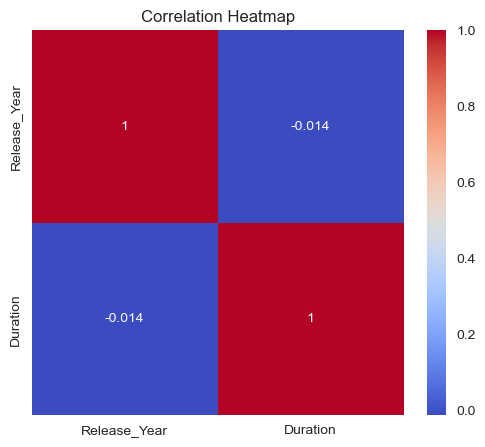

In [13]:
# (Numerical Columns)

plt.figure(figsize=(6,5))
sns.heatmap(df[['Release_Year','Duration']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [14]:
# Insights & Conclusion
# ## 💡 Key Insights
# - **Movies dominate Netflix’s library**, accounting for ~65% of total titles.  
# - Content production **increased significantly after 2015**, reflecting Netflix’s global expansion.  
# - The most common genres are **Drama**, **Comedy**, and **Action**, indicating diverse audience targeting.  
# - **United States** and **India** are the top content-producing countries.  
# - Ratings like **TV-MA** and **TV-14** dominate, showing Netflix’s focus on mature audiences.  
# - Most movies range between **80–140 minutes**, while TV shows mostly have **1–5 seasons**.

# ## ✅ Conclusion
# This visualization-based EDA provides valuable insights into Netflix’s evolving content strategy from 2010 to 2024.  
# It highlights the platform’s expansion across countries, genres, and formats while maintaining audience-driven diversity.

# ### 🧠 Future Enhancements
# - Incorporate real Netflix data for time-series trend analysis  
# - Use natural language processing to analyze show descriptions and tags  
# - Build a recommendation dashboard based on genre and rating preferences
